# Example: Successive halving
-----------------------------

This example shows how to compare multiple tree-based models using successive halving.

Import the california housing dataset from [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).
 This is a small and easy to train dataset whose goal is to predict house prices.

## Load the data

In [1]:
from sklearn.datasets import fetch_california_housing
from atom import ATOMRegressor

In [2]:
# Load the data
X, y = fetch_california_housing(return_X_y=True)

## Run the pipeline

In [3]:
atom = ATOMRegressor(X, y, verbose=2, random_state=1)

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Regression.

Dataset stats ==================== >>
Shape: (20640, 9)
Train set size: 16512
Test set size: 4128
-------------------------------------
Memory: 1.49 MB
Scaled: False
Outlier values: 786 (0.5%)



In [4]:
# Compare tree-based models via successive halving
atom.successive_halving(
    models=["Tree", "Bag", "ET", "RF", "LGB", "CatB"],
    metric="mae",
    n_bootstrap=5,
)


Training ========================= >>
Metric: mae


Run: 0 =========================== >>
Models: Tree6, Bag6, ET6, RF6, LGB6, CatB6
Size of training set: 16512 (17%)
Size of test set: 4128


Results for DecisionTree:
Fit ---------------------------------------------
Train evaluation --> mae: -0.0
Test evaluation --> mae: -0.5394
Time elapsed: 0.103s
Bootstrap ---------------------------------------
Evaluation --> mae: -0.576 ± 0.0119
Time elapsed: 0.422s
-------------------------------------------------
Time: 0.525s


Results for Bagging:
Fit ---------------------------------------------
Train evaluation --> mae: -0.1715
Test evaluation --> mae: -0.4308
Time elapsed: 0.450s
Bootstrap ---------------------------------------
Evaluation --> mae: -0.435 ± 0.0059
Time elapsed: 2.061s
-------------------------------------------------
Time: 2.511s


Results for ExtraTrees:
Fit ---------------------------------------------
Train evaluation --> mae: -0.0
Test evaluation --> mae: -0.3977
Time 

## Analyze the results

In [5]:
# The results is now multi-index, where frac is the fraction
# of the training set used to fit the model. The model names
# end with the number of models fitted during that run
atom.results

mae_train  mae_test  time_fit  mae_bootstrap  time_bootstrap  \
frac model                                                                 
0.17 Bag6     -0.2017   -0.4327  0.450035      -0.434981        2.061373   
     CatB6    -0.2065   -0.3557  5.083625      -0.355352       20.176994   
     ET6      -0.0694   -0.4077  1.574000      -0.405855        7.106890   
     LGB6     -0.2202   -0.3676  0.438399      -0.367271        0.885806   
     RF6      -0.1851   -0.4165  4.178345      -0.416217       18.156310   
     Tree6    -0.1039   -0.5897  0.102987      -0.575962        0.422224   
0.33 CatB3    -0.2249   -0.3384  4.800246      -0.335246       22.708465   
     ET3      -0.0935   -0.3879  2.738315      -0.384081       11.258794   
     LGB3     -0.2489   -0.3405  0.389353      -0.344951        0.875797   
1.00 CatB1    -0.2447   -0.3066  6.851350      -0.309112       33.428059   

                 time  
frac model             
0.17 Bag6    2.511408  
     CatB6  25.260619  
     ET6     8.680890  
     LGB6    1.324205  
     RF6    22.334655  
     Tree6   0.525211  
0.33 CatB3  27.508711  
     ET3    13.997109  
     LGB3    1.265150  
1.00 CatB1  40.279409

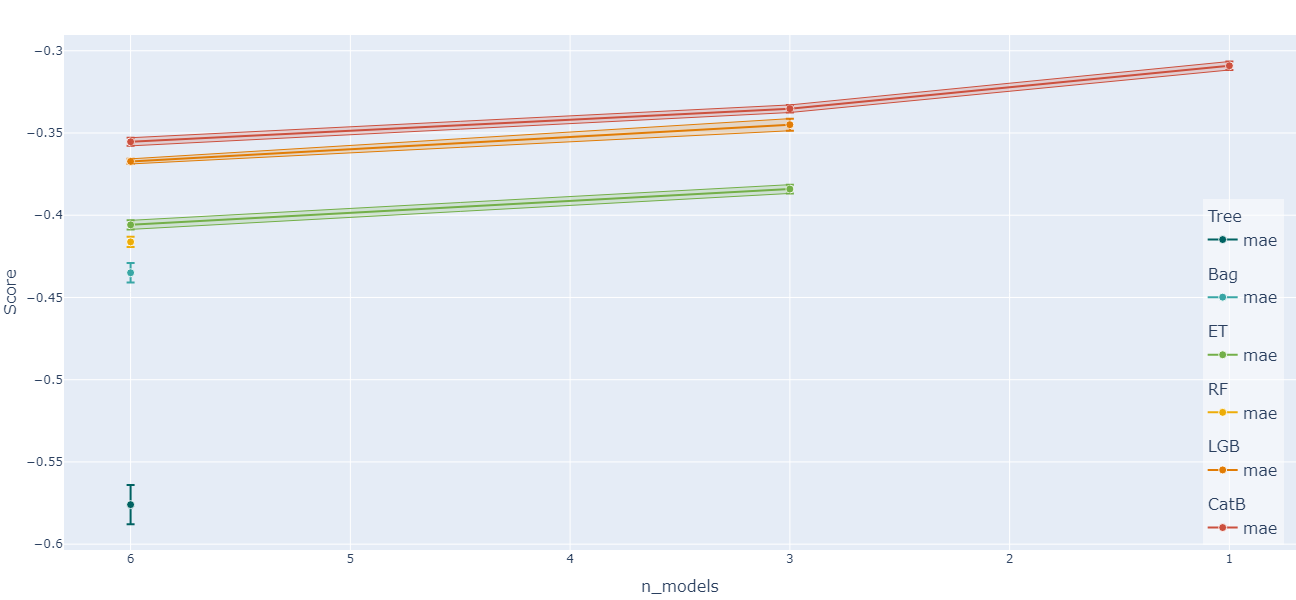

In [6]:
# Plot the successive halving's results
atom.plot_successive_halving()

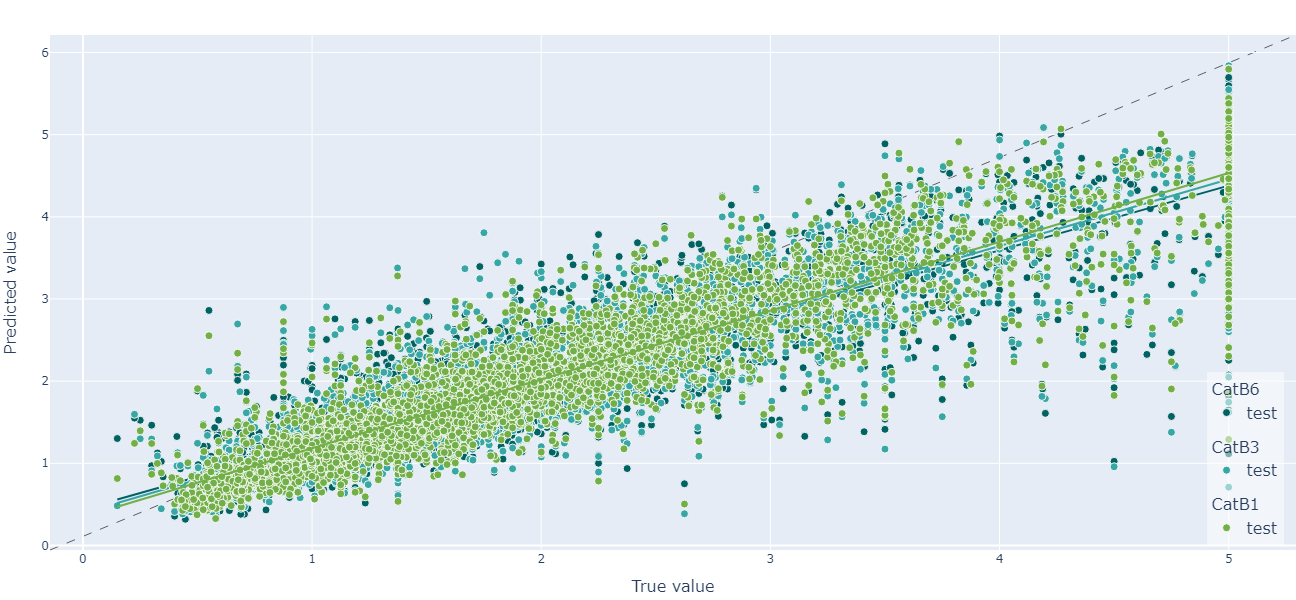

In [7]:
# Use regex to call all the models with the same estimator...
atom.plot_errors(models=["CatB.*"])

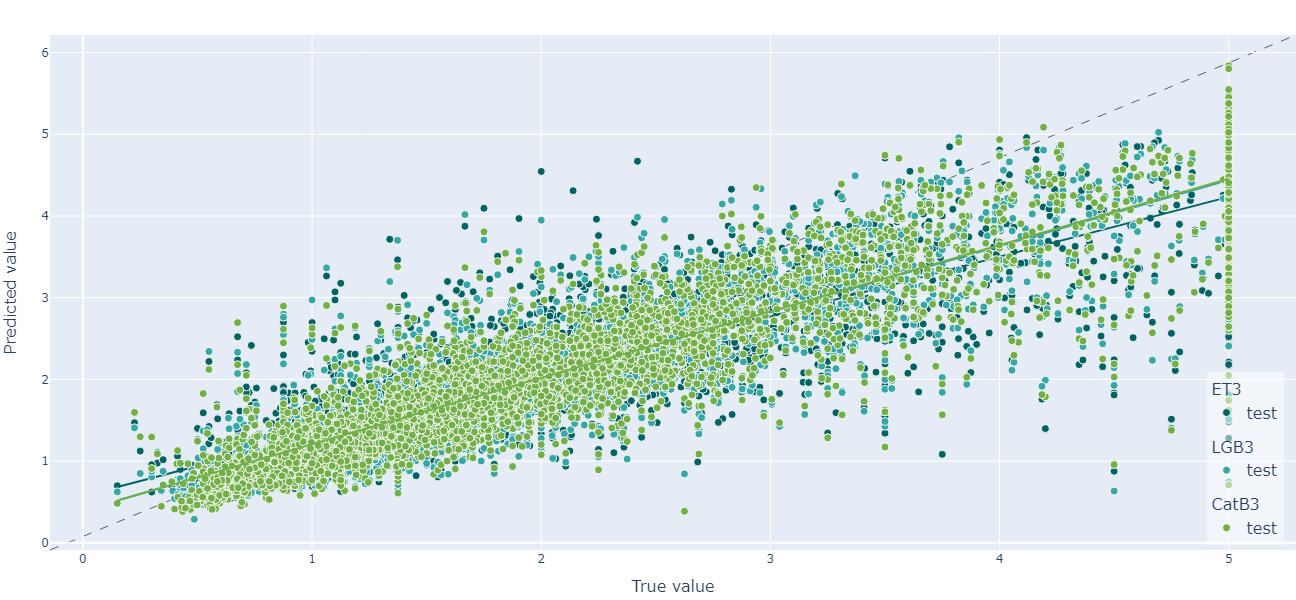

In [8]:
# ...or to call the models from the same run
atom.plot_errors(models=".*3")